In [86]:
source("preset.R")
library(lubridate)
library(reshape2)

In [5]:
economics

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018
1968-01-01,530.9,199808,11.7,5.1,2878
1968-02-01,533.6,199920,12.3,4.5,3001
1968-03-01,544.3,200056,11.7,4.1,2877


In [69]:
ggplot_with_size <- function(..., plot_size = NULL) {
    if (!is.null(plot_size)) {
        properties <- c("width", "height", "res")
        cur_plot_size <- map(properties, ~getOption("repr.plot." %+% .x)) %>% set_names(properties)
#         on.exit(exec("set_plot_size", !!!cur_plot_size), add = TRUE)
        
        new_plot_size <- cur_plot_size
        for (i in seq_along(plot_size)) new_plot_size[[i]] <- plot_size[[i]]
        exec("set_plot_size", !!!new_plot_size)
    }
    ggplot2::ggplot(...)
}

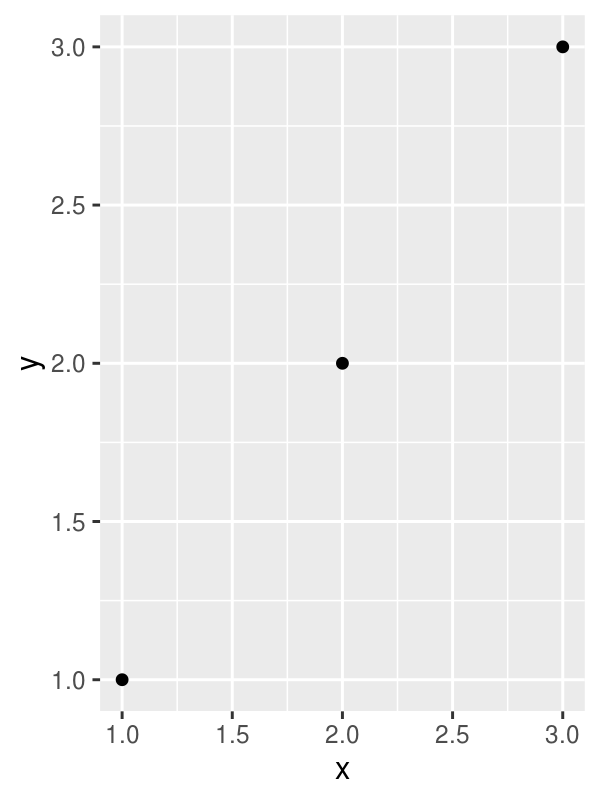

In [70]:
ggplot_with_size(tibble(x = 1:3, y = 1:3), aes(x, y), plot_size = c(3, 4, 200)) + geom_point()

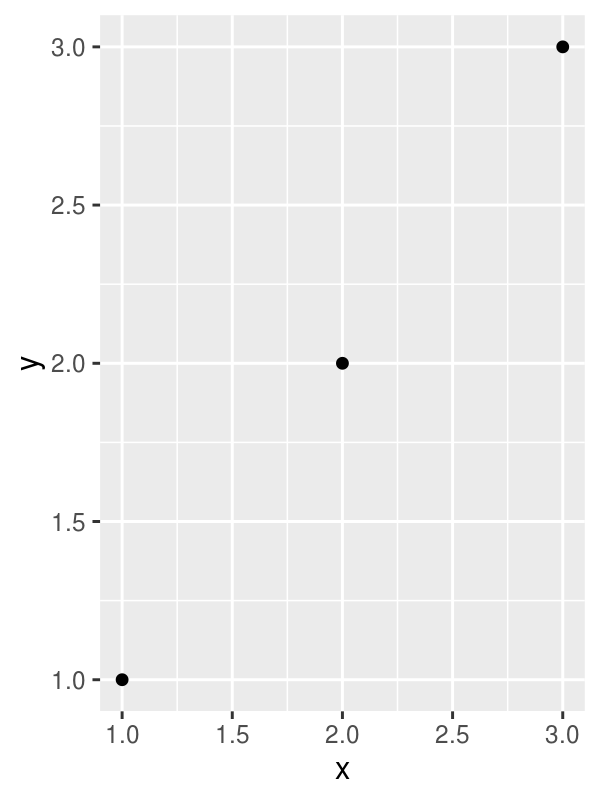

In [71]:
ggplot_with_size(tibble(x = 1:3, y = 1:3), aes(x, y)) + geom_point()

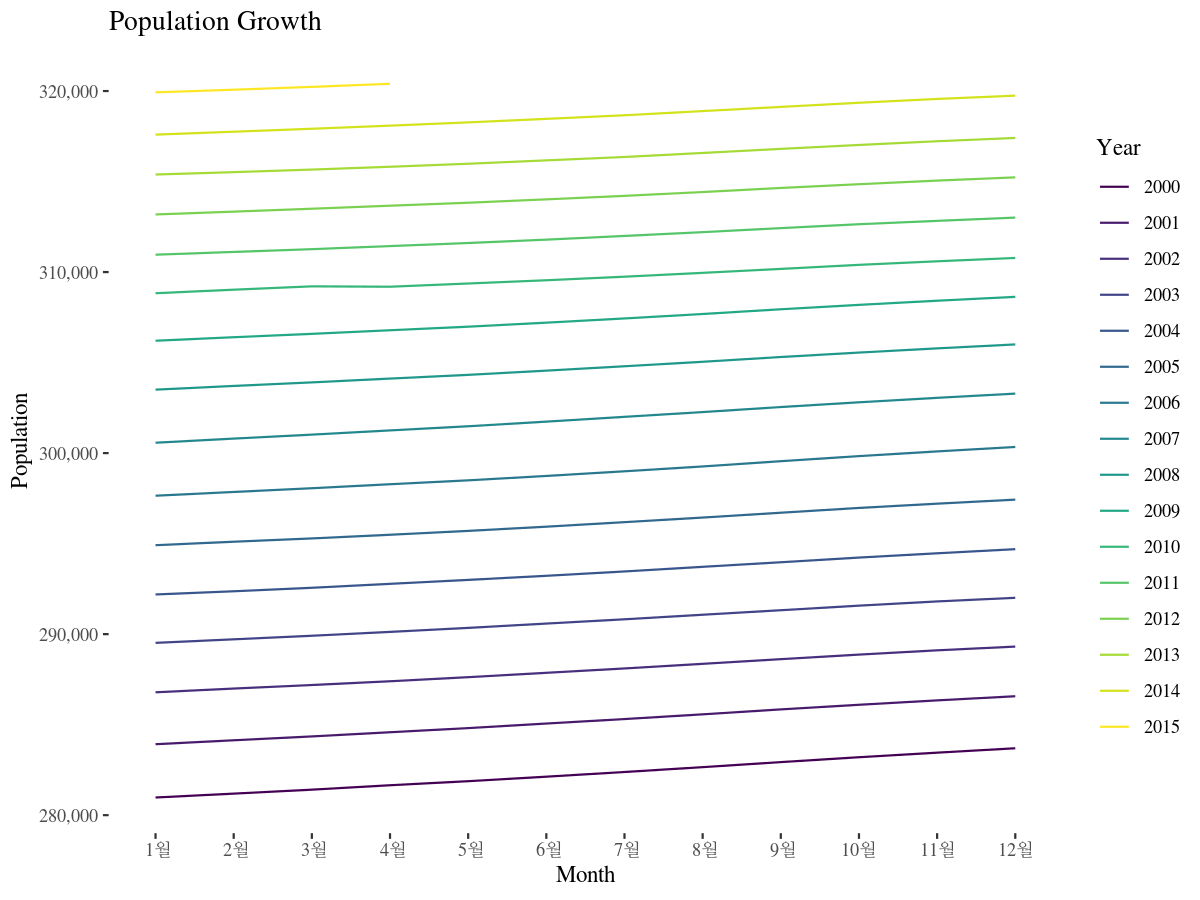

In [79]:
set_plot_size(8, 6, 150)
economics %>% 
    mutate(
        year = factor(year(date), ordered = TRUE), 
        month = month(date, label = TRUE), 
    ) %>% 
    filter(year >= 2000) %>% 
    ggplot(aes(month, pop)) + 
        geom_line(aes(group = year, color = year)) + 
        labs(x = "Month", y = "Population", title = "Population Growth", color = "Year") + 
        scale_y_continuous(labels = scales::comma) +
        theme_tufte()

In [ ]:
economics %>% filter()

In [87]:
"aa_%s_aa" %s% "bb"

[1] "aa_bb_aa"

In [82]:
x <- "bb"

In [84]:
glue("ab_{x}_cc")

ab_bb_cc

In [89]:
m <- matrix(1:6, ncol = 3)
m

1,3,5
2,4,6


In [90]:
apply(m, 1, sum)

[1]  9 12

In [104]:
cond <- "cut"
diamonds %>% 
    group_by(cut) %>% 
    summarise(
        price_mean = mean(price), 
        carat_sum = sum(carat), 
    ) %>% 
    filter(!!sym(cond) == "Fair")

cut,price_mean,carat_sum
<ord>,<dbl>,<dbl>
Fair,4358.758,1684.28


In [111]:
diamonds %>% group_by(cut) %>% top_n(n = 2, wt = x) %>% arrange(cut, x)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
5.01,Fair,J,I1,65.5,59,18018,10.74,10.54,6.98
3.00,Good,I,I1,57.0,64,10863,9.38,9.31,5.33
3.01,Good,H,SI2,57.6,64,18593,9.44,9.38,5.42
3.00,Very Good,H,I1,63.1,55,6512,9.23,9.10,5.77
4.00,Very Good,I,I1,63.3,58,15984,10.01,9.94,6.31
4.01,Premium,J,I1,62.5,62,15223,10.02,9.94,6.24
4.01,Premium,I,I1,61.0,61,15223,10.14,10.10,6.17
3.22,Ideal,I,I1,62.6,55,12545,9.49,9.42,5.92


In [112]:
x <- sample(100, replace = TRUE)

In [114]:
mean(x)

[1] 50.58

In [115]:
head(economics, 4)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143


In [133]:
economics %>% 
    select(pce, psavert, uempmed, unemploy) %>% 
    cor() 

,pce,psavert,uempmed,unemploy
pce,1.0000000,-0.7928546,0.7269616,0.6145176
psavert,-0.7928546,1.0000000,-0.3251377,-0.3093769
uempmed,0.7269616,-0.3251377,1.0000000,0.8693097
unemploy,0.6145176,-0.3093769,0.8693097,1.0000000


In [141]:
?melt

In [142]:
economics %>% 
    select(pce, psavert, uempmed, unemploy) %>% 
    cor() %>% 
    melt(varnames = c("x", "y"), value.name = "cor")

x,y,cor
<fct>,<fct>,<dbl>
pce,pce,1.0000000
psavert,pce,-0.7928546
uempmed,pce,0.7269616
unemploy,pce,0.6145176
pce,psavert,-0.7928546
psavert,psavert,1.0000000
uempmed,psavert,-0.3251377
unemploy,psavert,-0.3093769
pce,uempmed,0.7269616


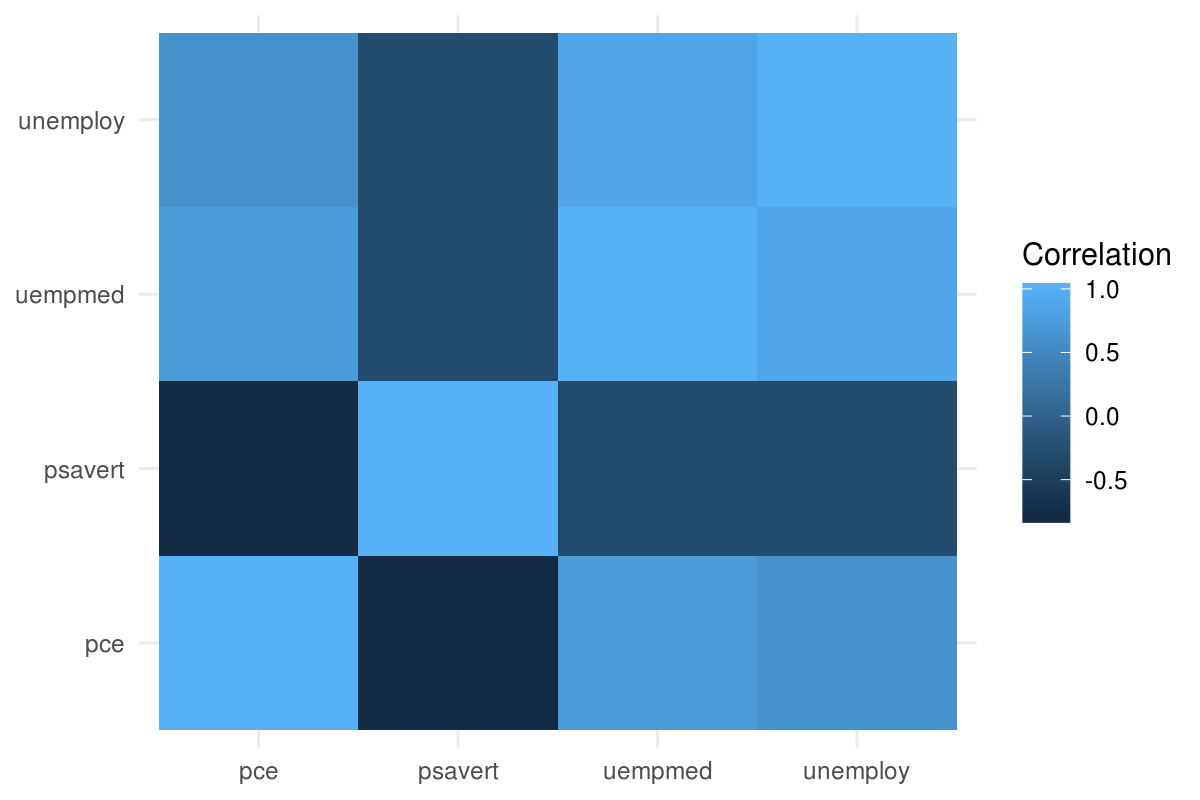

In [137]:
economics %>% 
    select(pce, psavert, uempmed, unemploy) %>% 
    cor() %>% 
    as_tibble(rownames = 'x') %>% 
    gather(y, cor, -x) %>% 
    ggplot(aes(x, y)) + 
        geom_tile(aes(fill = cor)) + 
        labs(x = NULL, y = NULL, fill = "Correlation") + 
        theme_minimal()
#     mutate(x = factor(row.names(.)))

In [143]:
tips

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2


In [153]:
mean(tips$tip)

[1] 2.998279

In [147]:
tips %>% group_by(sex) %>% summarise(mean(tip))

sex,mean(tip)
<fct>,<dbl>
Female,2.833448
Male,3.089618


In [157]:
t.test(tips$tip, mu = 2.5, alternative = "two.sided", conf.level = 0.9)


	One Sample t-test

data:  tips$tip
t = 5.6253, df = 243, p-value = 5.08e-08
alternative hypothesis: true mean is not equal to 2.5
90 percent confidence interval:
 2.852023 3.144535
sample estimates:
mean of x 
 2.998279 


In [171]:
qnorm(0.05, 0.95)

[1] -0.6948536

In [ ]:
df <- 243
t <- 5.6253

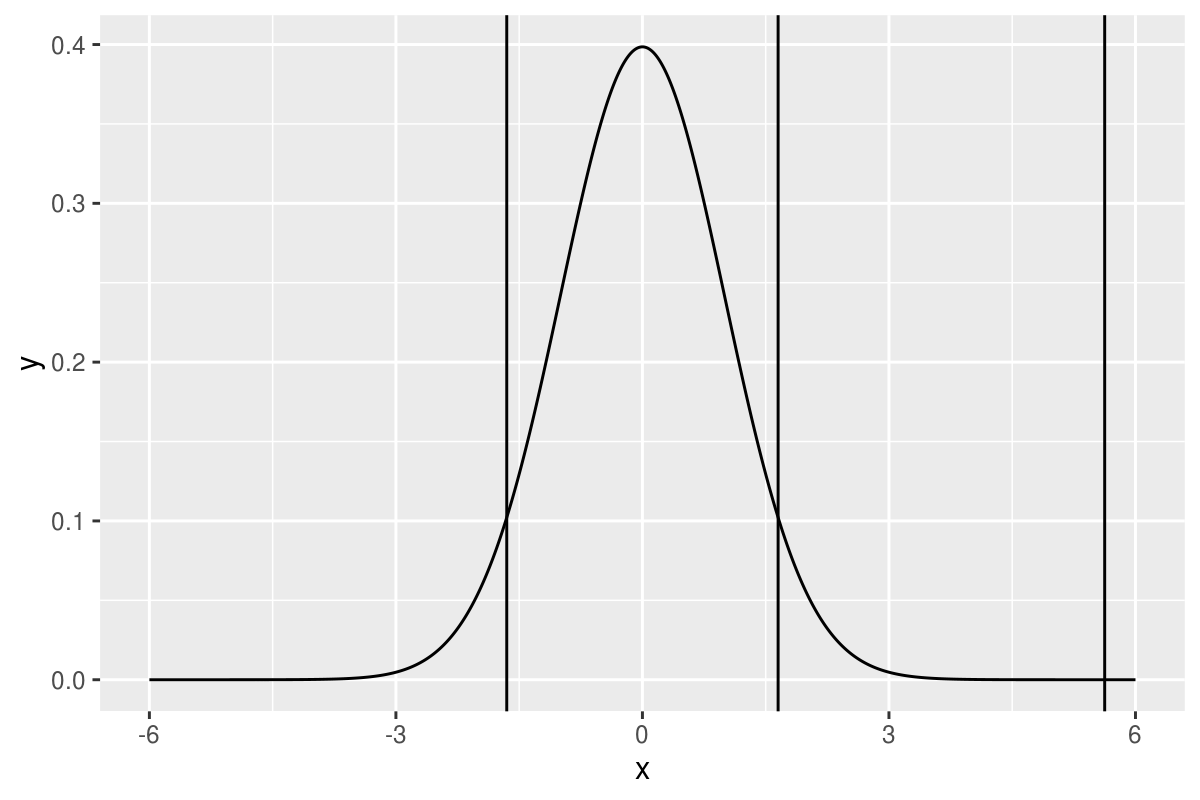

In [187]:
tibble(x = seq(-6, 6, length.out = 1000)) %>% 
    mutate(y = dt(x, df = df)) %>% 
    ggplot(aes(x, y)) + 
        geom_line() + 
        geom_vline(xintercept = t) + 
        geom_vline(xintercept = qt(c(0.05, 0.95), df = df)) + 
        xlim(c(-6, 6))

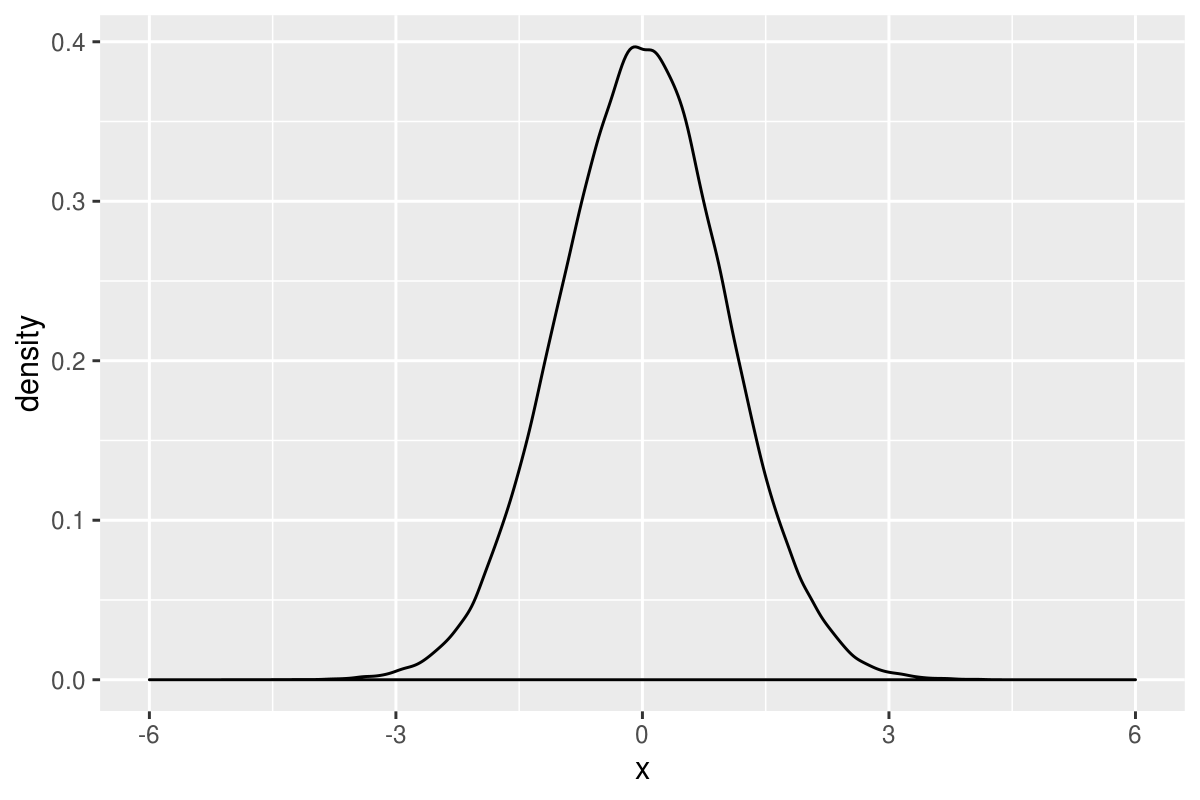

In [188]:
tibble(x = rt(100000, df = df)) %>% 
    ggplot(aes(x)) + geom_density() + xlim(c(-6, 6))

In [189]:
tips %>% group_by(sex) %>% summarize(var(tip))

sex,var(tip)
<fct>,<dbl>
Female,1.344428
Male,2.217424


In [193]:
mean(tips$tip)

[1] 2.998279

In [195]:
str(shapiro.test(tips$tip))

List of 4
 $ statistic: Named num 0.898
  ..- attr(*, "names")= chr "W"
 $ p.value  : num 8.2e-12
 $ method   : chr "Shapiro-Wilk normality test"
 $ data.name: chr "tips$tip"
 - attr(*, "class")= chr "htest"


In [197]:
tips %>% group_by(sex) %>% summarize(p.value = shapiro.test(tip)$p.value)

sex,p.value
<fct>,<dbl>
Female,5.448281e-03
Male,3.708483e-10


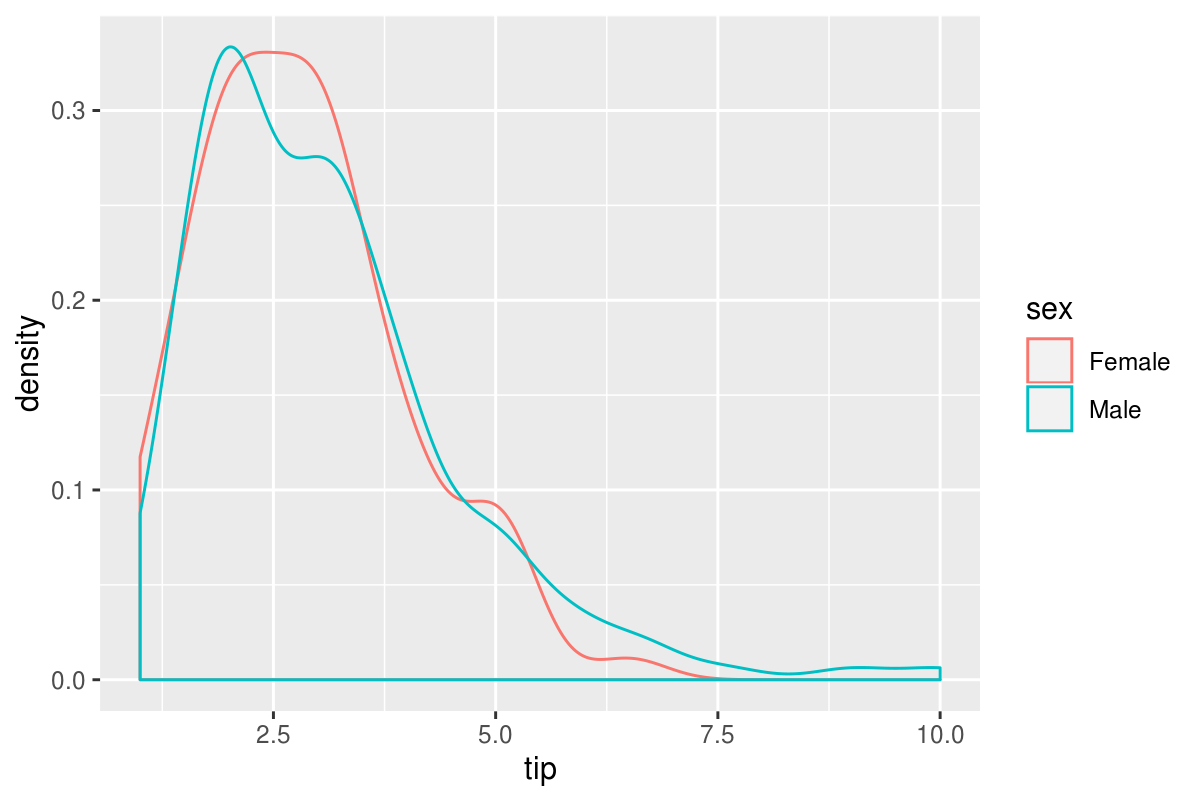

In [199]:
ggplot(tips, aes(tip, color = sex)) + geom_density()
    

In [200]:
ansari.test(tip ~ sex, tips)


	Ansari-Bradley test

data:  tip by sex
AB = 5582.5, p-value = 0.376
alternative hypothesis: true ratio of scales is not equal to 1


In [201]:
t.test(tip ~ sex, data = tips, var.equal = TRUE)


	Two Sample t-test

data:  tip by sex
t = -1.3879, df = 242, p-value = 0.1665
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6197558  0.1074167
sample estimates:
mean in group Female   mean in group Male 
            2.833448             3.089618 


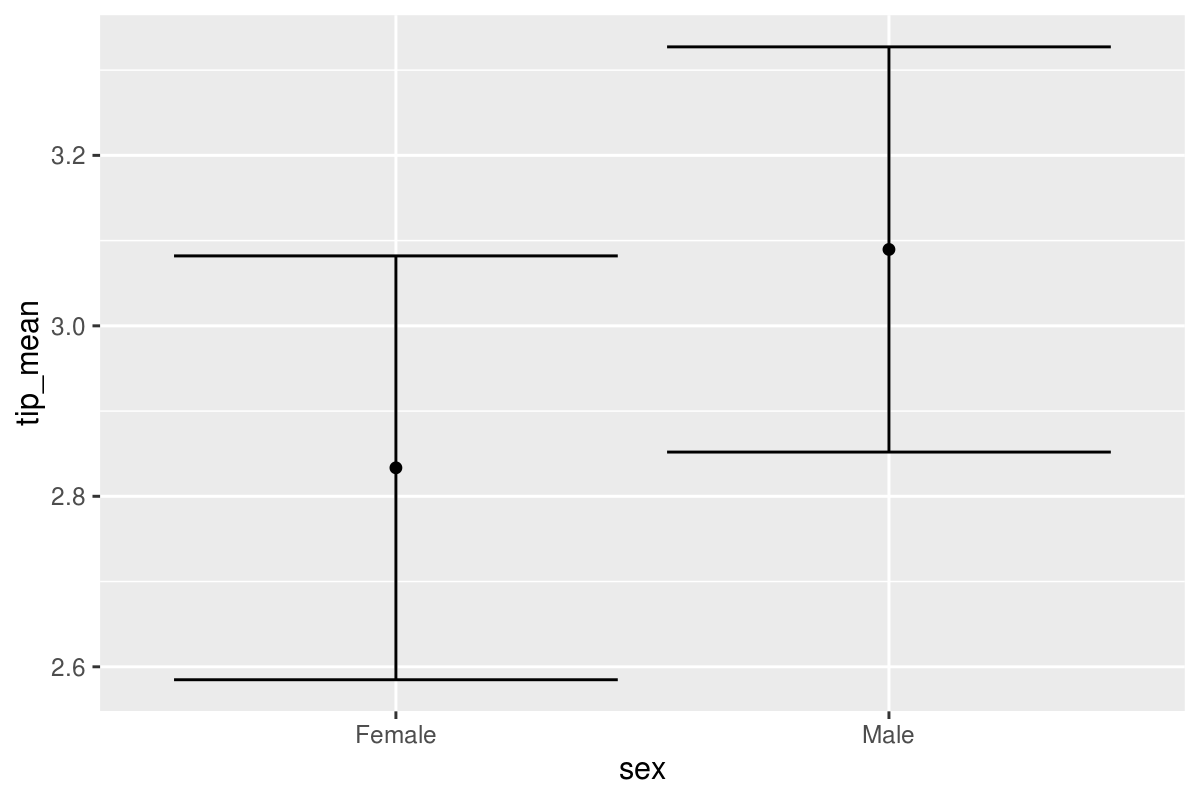

In [210]:
tips %>% 
    group_by(sex) %>% 
    summarise(tip_mean = mean(tip), tip_se = sd(tip) / sqrt(n())) %>% 
    ggplot(aes(sex, tip_mean)) + 
        geom_point() + 
        geom_errorbar(aes(ymin = tip_mean - 2 * tip_se, ymax = tip_mean + 2 * tip_se))

In [213]:
mod <- aov(tip ~ day - 1, data = tips)
summary(mod) 

           Df Sum Sq Mean Sq F value Pr(>F)    
day         4 2203.0   550.8   290.1 <2e-16 ***
Residuals 240  455.7     1.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

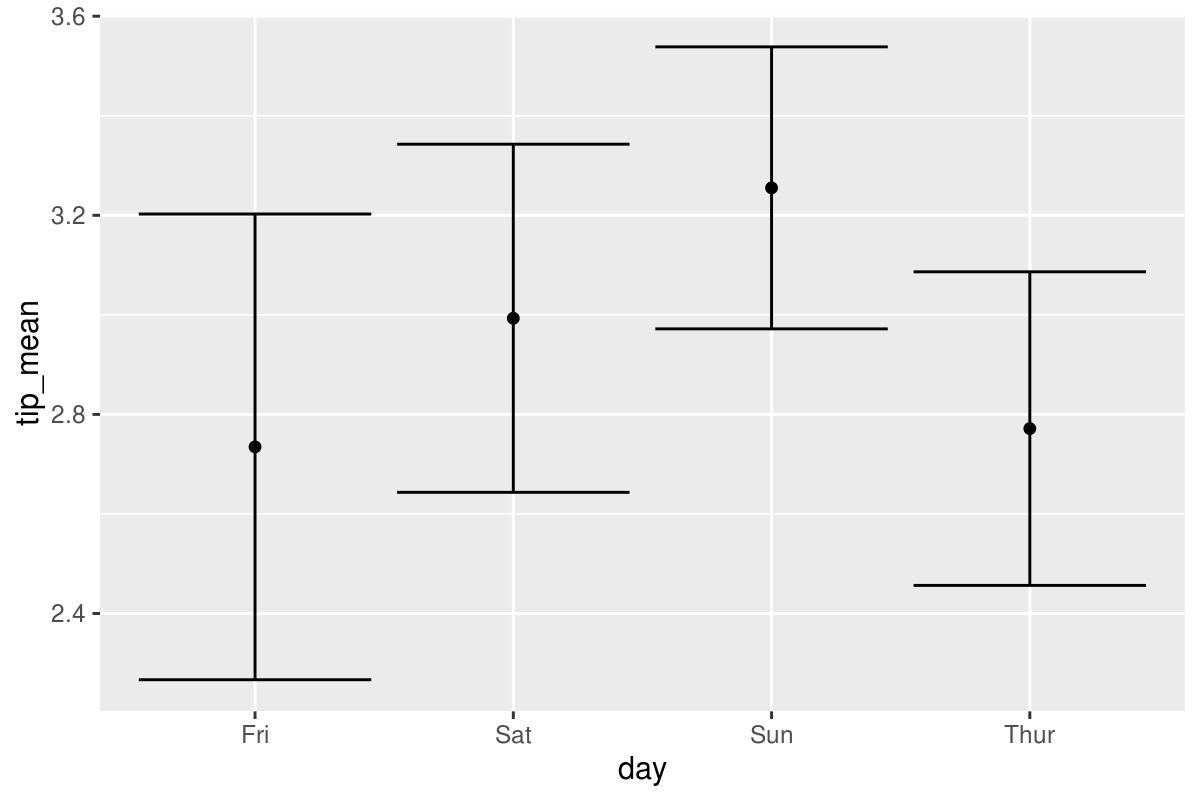

In [215]:
tips %>% 
    group_by(day) %>% 
    summarise(tip_mean = mean(tip), tip_se = sd(tip) / sqrt(n())) %>% 
    ggplot(aes(day, tip_mean)) + 
        geom_point() + 
        geom_errorbar(aes(ymin = tip_mean - 2 * tip_se, ymax = tip_mean + 2 * tip_se))